In [ ]:
!chmod 600 ~/.passwd-s3fs

In [ ]:
!apt install s3fs

Reading package lists... Done
Building dependency tree       
Reading state information... Done
s3fs is already the newest version (1.82-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.


In [ ]:
!mkdir /s3
!s3fs um2ii-datasets /s3

mkdir: cannot create directory ‘/s3’: File exists
s3fs: MOUNTPOINT directory /s3 is not empty. if you are sure this is safe, can use the 'nonempty' mount option.


In [ ]:
import pandas as pd
from fastai.vision.all import *
from sklearn.model_selection import train_test_split
import os
from glob import glob
from sklearn import metrics
from PIL import Image
Image.MAX_IMAGE_PIXELS = None

CheXpert v1 Race Validation

In [ ]:
test_df = pd.read_csv('/content/brax_split.csv')
test_df['Path'] = '/s3/BRAX/brax/1.1.0/' + test_df['PngPath']
test_df.shape
chexpert_race1_model = load_learner('/content/chexpert_race1.pkl')
chexpert_race1_model.dls.to(device='cuda')
chexpert_race1_model.model.to(device='cuda')
race_test_dl = chexpert_race1_model.dls.test_dl(test_df)
race_preds = chexpert_race1_model.get_preds(dl=race_test_dl, with_decoded=True)
chexpert_race1_model.dls.vocab

['Non-Hispanic Asian', 'Non-Hispanic Black', 'Non-Hispanic White']

<BarContainer object of 3 artists>

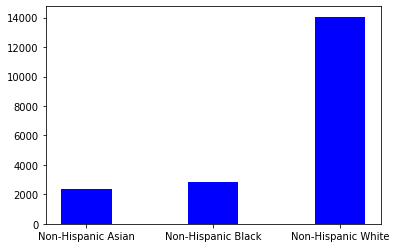

In [ ]:
race_labels = chexpert_race1_model.dls.vocab.o2i.keys()
prediction_counts = [race_preds[2].tolist().count(0), race_preds[2].tolist().count(1), race_preds[2].tolist().count(2)]
plt.bar(race_labels, prediction_counts, color ='blue',
        width = 0.4)

In [ ]:
test_df.insert(len(test_df.columns), 'Race/Ethnicity_Tensor_Id', race_preds[2].numpy())
test_df.insert(len(test_df.columns), 'Race/Ethnicity_Probability', race_preds[0].numpy().tolist())
print(test_df)
test_df.to_csv('/content/sample_data/chexpert_race_v1_brax_test.csv')

       Unnamed: 0  \
0              15   
1              27   
2              28   
3              37   
4              42   
...           ...   
19304       40952   
19305       40955   
19306       40956   
19307       40959   
19308       40965   

                                                                                                                                                                                                                             DicomPath  \
0      Anonymized_DICOMs/id_742733ae-f1e42d6f-c3321bbf-ff4877aa-91fccdb7/Study_01703939.83873630.55782623.67470478.88018120/Series_61356434.84672029.79491115.70523745.91511393/image-17669345-92645238-88468932-20689770-76356566.dcm   
1      Anonymized_DICOMs/id_d01e4357-d88df1e0-6c8c7f1e-ebb2b2c3-51c85eb7/Study_26748992.18152186.58980814.73735758.40434996/Series_12822042.80763897.28272949.99775598.90669032/image-45998641-12244164-06488577-25229699-69003334.dcm   
2      Anonymized_DICOMs/id_b6cb87ca-2a0fa358